<a href="https://colab.research.google.com/github/Tony-stark85/APSSDC.2/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64

In [2]:
!pip install imageio[avif]

In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 17.0 MB/s eta 0:00:00


In [4]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imageio.v3 as iio

In [11]:
IMAGE_PATH = '/content/arrays.jpg'
reader = easyocr.Reader(['en'], gpu = False)
image = iio.imread(IMAGE_PATH)
result = reader.readtext(image)
result


[([[86, 55], [727, 55], [727, 146], [86, 146]],
  'Types of Arrays in Ct+',
  0.6967671764685825),
 ([[78, 146], [804, 146], [804, 194], [78, 194]],
  'Single Dimensional Array: This is an array in which',
  0.5746816770152174),
 ([[901, 157], [1063, 157], [1063, 199], [901, 199]],
  'Type o the',
  0.8660530348124292),
 ([[81, 190], [783, 190], [783, 234], [81, 234]],
  'the data items are arranged linearly in one dimension',
  0.7833194604846313),
 ([[939, 195], [1024, 195], [1024, 236], [939, 236]],
  'Array',
  0.9734782950170533),
 ([[81, 229], [687, 229], [687, 269], [81, 269]],
  'only: It is commonly called a 1-D array: Syntax:',
  0.8035626015378347),
 ([[80, 306], [439, 306], [439, 346], [80, 346]],
  'datatype array-name[size];',
  0.9732410581874118),
 ([[719, 329], [953, 329], [953, 369], [719, 369]],
  'Single Dimensional',
  0.9999234299380791),
 ([[1010, 330], [1240, 330], [1240, 362], [1010, 362]],
  'Multi Dimensional',
  0.9786250690163227),
 ([[1085, 359], [1164, 35

In [12]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font_scale = 1.5
font = cv2.FONT_HERSHEY_SIMPLEX

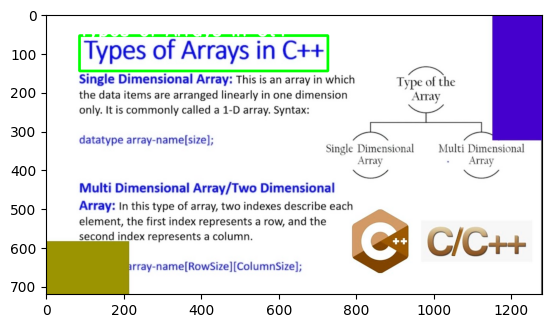

In [13]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, font_scale, (255,255,255), 3, cv2.LINE_AA)
plt.imshow(img)
plt.show()


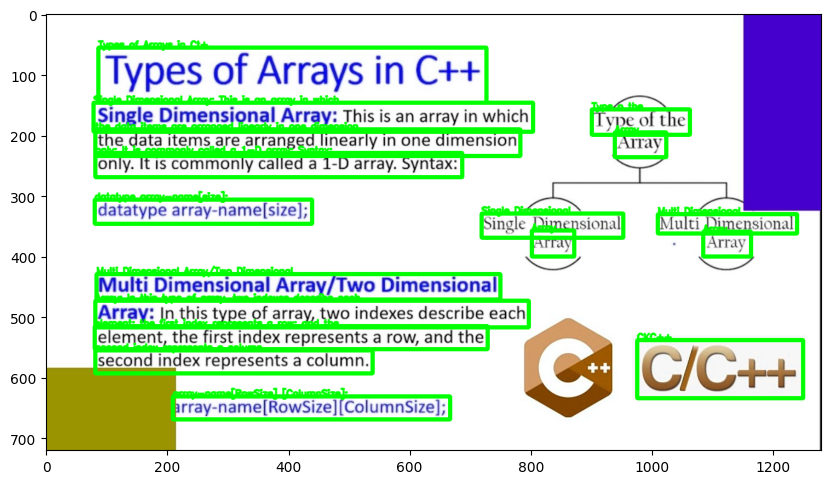

In [14]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
  img = cv2.putText(img, text, top_left, font, 0.5, (0,255,0), 2, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()



In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
def create_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # CNN layers for feature extraction
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Reshape for RNN layers
    new_shape = ((input_shape[0] // 4), (input_shape[1] // 4) * 64)
    x = layers.Reshape(target_shape=new_shape)(x)

    # RNN layers for sequence prediction
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)

    # Dense layer for classification
    outputs = layers.Dense(num_classes + 1, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Parameters
input_shape = (128, 32, 1)  # Example input shape (height, width, channels)
num_classes = 26  # Number of characters to recognize (for English alphabet)

# Create and compile the model
model = create_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 32, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 32, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 8, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 32, 256)             │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 32, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32, 27)              │           6,939 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,076,379 (4.11 MB)

 Trainable params: 1,076,379 (4.11 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import pytesseract
from PIL import Image

# Load the image
image_path = '/content/ak.jpg'  # Replace with your image path
img = Image.open(image_path)

# Perform OCR
custom_oem_psm_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(img, config=custom_oem_psm_config)

print(text)


RADH LKA
ASHOK



In [22]:
!apt-get install -y tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,918 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [18]:
!pip install  pytesseract